In [55]:
# 경고 메시지 무시
import warnings
 
warnings.filterwarnings("ignore")

In [56]:
import pandas as pd

# 데이터 로드
raw = pd.read_excel('data/demisoda_oranC_v5.xlsx')

raw.head(3)

,keyword,category,date,title,username,content,click,link,channel,site
0,EDC 데미소다,default,2019-08-30,푸드투데이 오늘 뉴스 - [이슈점검] 농민 보호 팽개친 농협 하나로마트의 '위험한 ...,푸드투데이,[푸드TV] 국회로 간 4-H 청소년 차세대 리더로 거듭나다[푸드투데이 = 홍성욱 ...,NaN,https://m.blog.naver.com/foodtoday1?Redirect=L...,default,naverBlog
1,EDC 데미소다,default,2019-08-30,[푸드투데이] 동아오츠카 데미소다 ‘EDC KOREA 2019’ 이벤트 진행,푸드투데이,동아오츠카 데미소다 ‘EDC KOREA 2019’ 이벤트 진행[푸드투데이 = 조성윤...,NaN,https://m.blog.naver.com/foodtoday1?Redirect=L...,default,naverBlog
2,EDC 데미소다,default,2019-09-01,동아오츠카 데미소다 EDC코리아 축제 참여,KoreaTourPress,동아오츠카가 데미소다브랜드로 '일렉트릭 데이지 카니발 코리아 2019 개최를 맞아 ...,NaN,https://m.blog.naver.com/tour_bangbang?Redirec...,default,naverBlog


In [57]:
print(raw['keyword'].value_counts())

미린다             621
써니텐             225
펩시 탑텐           107
오란씨 믹스맥스페스티벌     62
환타 헤드            44
EDC 데미소다         25
오란씨 CM송          25
UMF 데미소다         12
Name: keyword, dtype: int64


In [58]:
# 데이터 셋 선택
df = raw.loc[raw['keyword']=='미린다'].reset_index(drop = True)

#데이터 확인
print(df["content"].head())
print(df['keyword'].value_counts())

0     ???근황 잠시 쉬면서 출산준비 하고 있어요:)일 쉰지..이제 45일?그리고 출산...
1     ???남친이랑 간단하게? 먹고 싶어 분식으로 메뉴결정!?전혀 간단하지 않은 개수이...
2     2020년 1월 23일 목요일아사달목공방 문을 닫고 과외수업은 미리 다 해놓고아사...
3     https://blog.naver.com/rlawlgp0207/2216528134...
4     공덕 상호가기억이안나네요공덕족발은 비슷비슷하니ㅋㅋㅋㅋㅋㅋㅋ환타아니고미린다 서비스 ...
Name: content, dtype: object
미린다    621
Name: keyword, dtype: int64


In [59]:
data = df["content"]
data

0       ???근황 잠시 쉬면서 출산준비 하고 있어요:)일 쉰지..이제 45일?그리고 출산...
1       ???남친이랑 간단하게? 먹고 싶어 분식으로 메뉴결정!?전혀 간단하지 않은 개수이...
2       2020년 1월 23일 목요일아사달목공방 문을 닫고 과외수업은 미리 다 해놓고아사...
3       https://blog.naver.com/rlawlgp0207/2216528134...
4       공덕 상호가기억이안나네요공덕족발은 비슷비슷하니ㅋㅋㅋㅋㅋㅋㅋ환타아니고미린다 서비스 ...
                             ...                        
616    화산고학운동일방로길화산 내일은 내일생각하자.넘 급하게 맛있어서 들어갔다가 별생각없이...
617    화산고학운동일방로길화산 멋지네요~김에 맛있어서 사진찍었어요 넘 들어갔다가 급하게 토...
618    화산고학운동일방로길화산 행복한 하루!!들어갔다가 사진찍었어요 맛있어서 토하젓갈쌈이 ...
619    확실히 전 날 한시간 일찍 먹긴했지만개산책도 두번 나가고ㅋㅋ 그래서인가 몸무게가 줄...
620    휴양의 끝! 완! 판! 여유를 한~껏 즐길수있는VJ나트랑 스완도르 ALL~INCLU...
Name: content, Length: 621, dtype: object

In [60]:
import re

# 텍스트 정제 함수
def preprocessing_text(data):
    url = "(https?://)?(www.)?[a-zA-Z0-9./?=&-_]+[.]?[/][a-zA-Z0-9./?=&-_%]+"
    email = "[-_.+a-zA-Z0-9]+[@].+[.][[a-zA-Z0-9]+|[a-zA-Z0-9]+[.][a-zA-Z0-9]+]"
    
    for i in range(len(data)):
        data[i] = re.sub(url,"", data[i])
        data[i] = re.sub(email,"", data[i])
        data[i] = re.sub("[^가-힣a-zA-Z ]","", data[i])
        data[i] = data[i].lower()
    return data

# 텍스트 정제
clean_text = preprocessing_text(data)
clean_text

0       근황 잠시 쉬면서 출산준비 하고 있어요일 쉰지이제 일그리고 출산까지는 d너무 힘들...
1       남친이랑 간단하게 먹고 싶어 분식으로 메뉴결정전혀 간단하지 않은 개수이니만애매한 ...
2       년 월 일 목요일아사달목공방 문을 닫고 과외수업은 미리 다 해놓고아사녀는 하루 휴...
3       창원맛집 창원 봉림동 명륜진사갈비 돼지갈비 무한리필 맛집 고기맛집  창원맛집 창원...
4       공덕 상호가기억이안나네요공덕족발은 비슷비슷하니환타아니고미린다 서비스 주십니다코카콜...
                             ...                        
616    화산고학운동일방로길화산 내일은 내일생각하자넘 급하게 맛있어서 들어갔다가 별생각없이 ...
617    화산고학운동일방로길화산 멋지네요김에 맛있어서 사진찍었어요 넘 들어갔다가 급하게 토하...
618    화산고학운동일방로길화산 행복한 하루들어갔다가 사진찍었어요 맛있어서 토하젓갈쌈이 급하...
619    확실히 전 날 한시간 일찍 먹긴했지만개산책도 두번 나가고 그래서인가 몸무게가 줄었음...
620    휴양의 끝 완 판 여유를 한껏 즐길수있는vj나트랑 스완도르 allinclusive ...
Name: content, Length: 621, dtype: object

In [61]:
# 형태소 분석기 Mecab
from konlpy.tag import Mecab
mecab = Mecab()

# mecab.morphs(clean_text[0])

# 명사만 추출
# mecab.nouns(data)

# 품사 포함 추출
# mecab.pos(clean_text[0],flatten=True)

# 형태소 분석
from tqdm import tqdm

tot_sen = []

for i in tqdm(range(len(clean_text))):
    sen = mecab.nouns(clean_text[i])
    sen = [word for word in sen if len(word) > 1] #1글자 이상만 추출
    tot_sen.append(sen)

tot_word = tot_sen

#tot_sen[0]

100%|██████████| 621/621 [00:02<00:00, 282.20it/s]


In [62]:
# # 품사 선택 
# tot_word = []
# for sentence1 in tot_sen:
#     for word, tag in sentence1:
#         if tag in ['NNP','NNG', 'VV', 'VA']:
#             tot_word.append(word)
            
# tot_word[:30]

In [63]:
# 바꾸기
clean_noun = [[re.sub('^동아$','동아오츠카',noun_) for noun_ in nouns] for nouns in tot_word]
clean_noun = [[re.sub('^플라$','나플라',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^식품$','종합식품기업',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^체리$','체리콕',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^한정$','한정판매',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^이디$','이디엠',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^엑스$','엑스레이티드',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^놀이$','놀이기구',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^메인스$','메인스테이지',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^루트$','앱솔루트',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^디자인$','투엘디자인',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^그루비$','그루비룸',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^마틴$','마틴게릭스',noun_) for noun_ in nouns] for nouns in clean_noun]


# 제거
clean_noun = [[noun_ for noun_ in nouns if noun_ != "사람"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "월일"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "사진"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "판매"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "선택"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "옵션"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "화질"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "출처"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "가격"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "머리"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "장소"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "오란씨"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "생각"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "재생"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "오츠카"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "기업"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "연락"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "페스티벌"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "진행"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "기자"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "배란"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "울트라"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "코리아"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "기댕이"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "일차"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "마니"] for nouns in clean_noun]



# 불용어 삭제
f = open("data/stopwords_list.txt", 'r',encoding='CP949')
line = [line.rstrip() for line in f.readlines()]

for i in range(len(line)):
    clean_noun = [[noun_ for noun_ in nouns if noun_ != line[i]] for nouns in clean_noun]

In [64]:
# 단어 카운트 함수
def count_noun(data):
    t_noun = list()
    
    for _ in data:
        t_noun.extend(_)
    
    t_noun_s = pd.DataFrame(t_noun, columns=['word'])
    t_noun_f = t_noun_s.groupby('word').size().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True)
    
    return t_noun_f

# 단어 카운트
frq_noun = count_noun(clean_noun)
frq_noun[:30]

,word,count
0,맛집,789
1,미린다,755
2,고기,690
3,메뉴,666
4,음료,589
5,주문,575
6,친구,487
7,음식,479
8,정도,471
9,치즈,430


In [65]:
# 자료 형태 변환하기
clean_noun_unlist = [[" ".join(nouns)] for nouns in clean_noun]
clean_noun_sr = preprocessing_text(pd.Series(clean_noun_unlist).astype(str))
clean_noun_sr

0      근황 출산 준비 출산 회사 아기 어딜 평일 종일 어젠 씨리 티비 과자 휘리 김치찌개...
1      남친 분식 메뉴 결정 개수 방문 주말 인계동 순대 순대 주문 김밥 상상 처음 달걀 ...
2      목요일 아사달 목공 과외 수업 사녀 휴가 구정 연휴 속초 고고씽 요즘 마음 대신 속...
3      창원 맛집 창원 봉림동 명륜 진사 갈비 돼지갈비 무한리필 맛집 고기 맛집 창원 맛집...
4      공덕 상호 기억 공덕 족발 서비스 코카 콜라 콜라 순대 국무 리필 소주 도둑 리필 ...
                             ...                        
616    화산고 학운동 일방 화산 내일 별생각 토하 젓갈 쌈이 폭풍 흡입 외식 고기 추가 가...
617    화산고 학운동 일방 토하 젓갈 별생각 추가 고기 노루 누나 가브리 폭풍 흡입 분과 ...
618    화산고 학운동 일방 행복 토하 젓갈 별생각 노루 누나 추가 폭풍 흡입 가브리 분과 ...
619    개산 몸무게 체중계 안드로이드 버전 전날 비교 무튼 미니스톱 세트 사면 미린다 새벽...
620    휴양 여유 나트 스완 도르 요전 식사 다양 액티비티 제공 음료 주류 무제한 용지 이...
Length: 621, dtype: object

In [66]:
import numpy as np

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0).fit(frq_noun)

#generate tf-idf term-document matrix
A_tfidf_sp = tfidf.fit_transform(clean_noun_sr)
max_value = A_tfidf_sp.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
tfidf_dict = np.array(tfidf.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n", tfidf_dict[sorted_by_tfidf[:50]])
print("가장 높은 tfidf를 가진 특성:\n", tfidf_dict[sorted_by_tfidf[-50:]])

가장 낮은 tfidf를 가진 특성:
 ['고민' '직원' '가지' '처음' '정도' '테이블' '메뉴판' '추천' '가족' '사이다' '종류' '추가' '위치' '느낌'
 '양념' '부분' '이건' '아침' '점심' '세트' '자리' '분위기' '기억' '오랜만' '근처' '새우' '과일' '양파'
 '볶음밥' '서비스' '음식' '포스팅' '국물' '음료수' '모습' '셀프' '식사' '마지막' '최고' '샐러드' '저녁'
 '이용' '계란' '튀김' '무한리필' '구경' '존재' '마음' '가게' '주문']
가장 높은 tfidf를 가진 특성:
 ['엄마' '야채' '탄산' '커피' '콜라' '사랑' '김치' '여자' '도착' '카페' '사장' '메뉴' '요리' '언니'
 '고기' '여행' '파스타' '준비' '소스' '초밥' '방문' '치즈' '갈비' '떡볶이' '시장' '선물' '버거' '까스'
 '베트남' '피자' '닭갈비' '삼겹살' '부평' '이름' '식당' '세계' '쿠우' '영화' '맛집' '칼국수' '곱창' '문제'
 '호텔' '기분' '기본' '파인애플' '친구' '한국' '맥주' '음료']


In [70]:
# TF-IDF 낮은 단어 제거
no_low = [[noun_ for noun_ in nouns if noun_ not in list(tfidf_dict[sorted_by_tfidf[:50]])] for nouns in clean_noun]

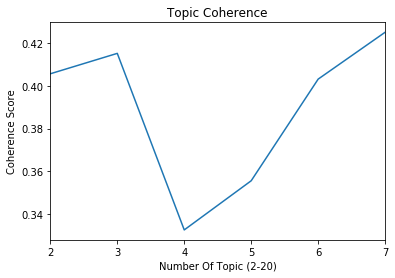

In [71]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt

# 바이그램
bigram = gensim.models.Phrases(no_low)
bigram_model = gensim.models.phrases.Phraser(bigram)
bigram_doc = [bigram_model[nouns] for nouns in no_low]
# trigram = gensim.models.Phrases(bigram[pre_noun])
# trigram_model = gensim.models.phrases.Phraser(trigram)

# Create Corpus: Term Document Frequency
id2word = corpora.Dictionary(bigram_doc)
corpus = [id2word.doc2bow(doc) for doc in bigram_doc]

# 최적 개수 그래프
coherence_score = []
k = []

for i in range(2,8):
    model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = id2word, num_topics=i, passes=30, iterations=200)
    coherence_model = CoherenceModel(model, texts = bigram_doc, dictionary = id2word, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    #print('n=',i,"Score: ",coherence_lda)
    coherence_score.append(coherence_lda)

for i in range(2,8):
    k.append(i)

x = np.array(k)
y = np.array(coherence_score)
plt.title('Topic Coherence')
plt.plot(x,y)
plt.xlim(2,7)
plt.xlabel('Number Of Topic (2-20)')
plt.ylabel('Coherence Score')
plt.show()

In [77]:
num_topics = 7      #<<<<<<----------------------------------------------------------------위 그래프 보고 수정

# Create Dictionary
id2word = corpora.Dictionary(no_low)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in no_low]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=30,
                                           per_word_topics=True)

topics = lda_model.show_topics(formatted=False)
topics

[(0,
  [('맛집', 0.04314891),
   ('젓갈', 0.020111209),
   ('다양', 0.015469437),
   ('주류', 0.013528625),
   ('요리', 0.012706029),
   ('메뉴', 0.012640301),
   ('국수', 0.011395001),
   ('천안', 0.010596228),
   ('그릇', 0.009085161),
   ('원조', 0.008701641)]),
 (1,
  [('고기', 0.039610066),
   ('갈비', 0.020760482),
   ('초밥', 0.0147572),
   ('김치', 0.01055475),
   ('마늘', 0.010374184),
   ('미린다', 0.009979128),
   ('부위', 0.009271548),
   ('돼지', 0.0087568145),
   ('상추', 0.008003152),
   ('기본', 0.0074709323)]),
 (2,
  [('닭갈비', 0.017264888),
   ('엄마', 0.014969671),
   ('피자', 0.013552231),
   ('카드', 0.0104934955),
   ('선물', 0.010392384),
   ('언니', 0.010327081),
   ('춘천', 0.010052359),
   ('초코', 0.0092507675),
   ('커피', 0.008632533),
   ('크림', 0.008045276)]),
 (3,
  [('라운지', 0.025998568),
   ('떡볶이', 0.021890145),
   ('공항', 0.015562001),
   ('무료', 0.015220308),
   ('액티비티', 0.01393074),
   ('포함', 0.0125426715),
   ('커피', 0.010809016),
   ('베트남', 0.010441935),
   ('호텔', 0.009170084),
   ('예약', 0.008306621)]),
 (4,
